# 01_Tensorflow 설치_코딩 기초

In [1]:
!pip install tensorflow

In [2]:
# 텐서플로우 import
import tensorflow as tf

In [3]:
msg = tf.constant("Hello World!!!!")
tf.print(msg)

Hello World!!!!


In [4]:
# MNIST 4분할 데이터 불러오기
mnist = tf.keras.datasets.mnist

In [5]:
# MNIST 4분할 데이터 불러오기
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print("학습용 입력 데이터 모양 : ", x_train.shape)
print("학습용 출력 데이터 모양 : ", y_train.shape)
print("평가용 입력 데이터 모양 : ", x_test.shape)
print("평가용 출력 데이터 모양 : ", y_test.shape)

학습용 입력 데이터 모양 :  (60000, 28, 28)
학습용 출력 데이터 모양 :  (60000,)
평가용 입력 데이터 모양 :  (10000, 28, 28)
평가용 출력 데이터 모양 :  (10000,)


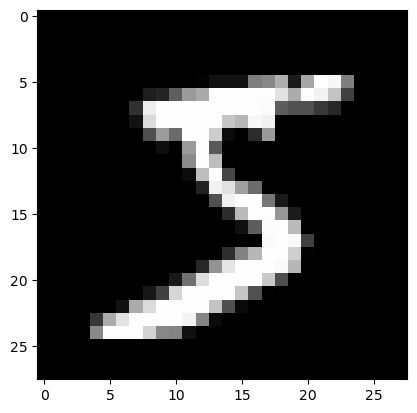

첫번째 학습용 데이터 입력값: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253

In [6]:
# 이미지 데이터 원본 출력
import matplotlib.pyplot as plt
# cmap='gray' => 흑백 이미지
plt.imshow(x_train[0], cmap='gray')
plt.show()

print("첫번째 학습용 데이터 입력값: \n", x_train[0])
print("첫번째 학습용 데이터 출력값: ", y_train[0])

In [7]:
# 이미지 데이터 [0->1]스케일링
# 데이터 스케일이란 데이터의 범위를 조정하여 모델 학습의 효율성을 높이고 성능을 개선하는 과정
x_train = x_train/255.0
x_test = x_test/255.0

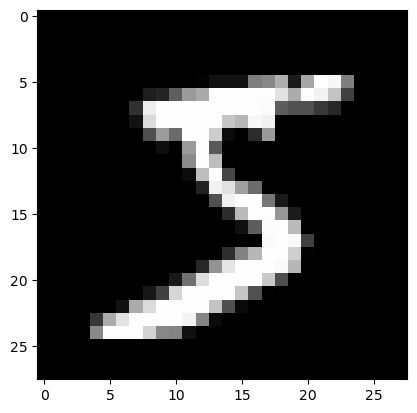

첫번째 학습용 데이터 입력값: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.


In [8]:
plt.imshow(x_train[0], cmap='gray')
plt.show()
print("첫번째 학습용 데이터 입력값: \n", x_train[0])


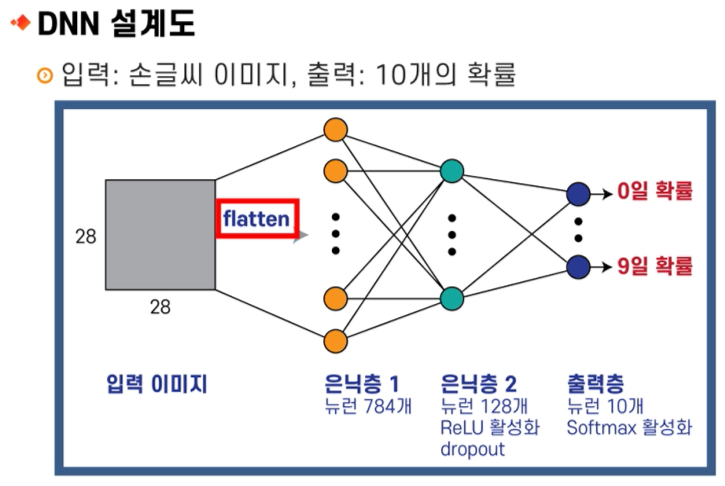

In [9]:
from IPython.display import Image
Image("img/day01_01.png", width=600)

#### DNN(Deep Neural Network, 딥 신경망)은 여러개의 은닉층을 가진 신경망
> - 신경망이 깊어질수록 복잡한 패턴을 작 학습할 수 있다.
> - 입력층 : 입력데이터를 받는 층, 각 뉴런은 입력 데이터의 하나의 특성을 나타난다.
> - 은닉층 : 입력층과 출력층 사이에위치한 층들, 데이터 특징을 학습하는데 역할 <br>
각 은닉층은 활성화 함수를 통해서 비 선형성을 추가한다. (ReLU, SigMoid, Tanh)
            
#### 활성화 함수 
> - ReLU : 입력값이 0보다 작으면 0을 출력하고, 그렇지 않으면 입력값 그대로 출력
> - SigMoid : 출력값을 0~1 사이로 변환된다.
> - Tanh : 출력값 -1과 1사이로 변횐된다.
> - Softmax : 다중 클래스 분류 문제에서 사용됨, 출력값들의 합이 1이되도록 한다.

### 학습 과정
> - 순전파 : 입력데이터를 출력층까지 통과 시키며, 각 층의 가중치와 활성화 함수를 통해 출력값 계산
> - 손실함수 : 예측값과 실제값 사이의 오차를 계산한다.(회귀 => MSE, 분류 : 교차엔트로피)
> - 역전파 : 손실함수로부터 계산된 오차를 각 층으로 역전파하여 가중치를 업데이트. (경사하강법 사용)
> - 가중치업데이트 : 학습률에 다라 가중치를 조정하여 모델을 최적화한다.

### 1) 케라스로 인공 신경망 구현

In [10]:
model = tf.keras.models.Sequential()
layers = tf.keras.layers

### 2) Flatten : 다차원 배열을 1차원배열로 변환시키는 역할 (Dense Layers와 같은 층에 데이터를 입력하기 위함)

In [11]:
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [12]:
model.add(Flatten(input_shape=(28,28)))

#  flatten (Flatten)  | (None(배치 크기를 지정하지 않음), 784)     |  0 (학습할 파라미터가 없음)


C:\Users\ICT05_01\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Dense 레이어는 완전 연결을 의미, 128개의 뉴런, 학습할 파라미터 수 : 100,480
# 128개의 뉴런은 성능과 효율성의 균형을 잘 맞추는 값으로 자주 사용된다. 
model.add(Dense(128, activation='relu'))

In [14]:
# 20%를 임의 선택 0으로 설정, 과적합 방지
model.add(Dropout(0.2))

In [16]:
# 10 : 출력 뉴런의 수
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 파라미터 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
#### 100,480은 = (784*128) + 128
#### 1290 = (128*10) + 10



### 3) 인공 신경망 학습 환경설정

In [19]:
# optimizer = 'adam' : 모델 가중치를 업데이트하는 방법 (널리 사용되는 최적화 알고리즘)
# loss = "sparse_categorical_crossentropy" : 손실 함수 정의, 분류에 해당하는 교차엔트로피 사용 (sparse_categorical_crossentropy)
# metrics=['accuracy'] : 모델 성능을 평가하기 위해 사용할 지표를 정의, 분류문제에서 예측이 정확한 비율 계산 (accuracy = 정확도)
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [20]:
# 인공 신경망 학습, epochs = 5 (반복 횟수)
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8567 - loss: 0.4809
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9562 - loss: 0.1494
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1080
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0845
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0730


In [21]:
# 인공 신경망 평가
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.0908


[0.07639437913894653, 0.9775999784469604]

In [22]:
# 인공 신경망 예측 (다시 3차원으로 만들기)
pick = x_test[0].reshape(1,28,28)

pred = model.predict(pick)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [27]:
# 예측
answer = tf.argmax(pred, axis=1)

In [29]:
print('인공신경망 추측 결과 (원본):', pred)
print('인공신경망 추측 결과 (해석):', answer)
print('정답:', y_test[0])

인공신경망 추측 결과 (원본): [[1.3667225e-09 1.1275531e-09 2.4039787e-07 6.7814290e-05 5.4951307e-13
  1.0497899e-07 5.8127811e-16 9.9993145e-01 1.5641547e-08 4.0627714e-07]]
인공신경망 추측 결과 (해석): tf.Tensor([7], shape=(1,), dtype=int64)
정답: 7


In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])